In [1]:
import miRNET
import miRNET_enrichment
from matplotlib import pyplot as plt
import numpy as np

In [7]:
name = 'miR-375' #кусок имени микроРНК
miR_targets = miRNET.Targets(name)
miR_targets = miR_targets.miR_targets
#tis_gene_set = 'all'
tis_gene_set = miRNET.tissue_selector() #если нужны гены какой-то конкретной ткань, то надо выполнить эту строчку

I found a miRNA with name: hsa-miR-375
and  477 unique targets
"Human Protein Atlas"(0) or "GTEx"(1) ? 1
Gene universe is...
0 ----- Adipose - Subcutaneous
1 ----- Adipose - Visceral (Omentum)
2 ----- Adrenal Gland
3 ----- Artery - Aorta
4 ----- Artery - Coronary
5 ----- Artery - Tibial
6 ----- Bladder
7 ----- Brain - Amygdala
8 ----- Brain - Anterior cingulate cortex (BA24)
9 ----- Brain - Caudate (basal ganglia)
10 ----- Brain - Cerebellar Hemisphere
11 ----- Brain - Cerebellum
12 ----- Brain - Cortex
13 ----- Brain - Frontal Cortex (BA9)
14 ----- Brain - Hippocampus
15 ----- Brain - Hypothalamus
16 ----- Brain - Nucleus accumbens (basal ganglia)
17 ----- Brain - Putamen (basal ganglia)
18 ----- Brain - Spinal cord (cervical c-1)
19 ----- Brain - Substantia nigra
20 ----- Breast - Mammary Tissue
21 ----- Cells - Cultured fibroblasts
22 ----- Cells - EBV-transformed lymphocytes
23 ----- Cervix - Ectocervix
24 ----- Cervix - Endocervix
25 ----- Colon - Sigmoid
26 ----- Colon - Transver

In [8]:
miR21_NET = miRNET.MainMirNetwork(G=miRNET.G, targets=miR_targets, CADgens=miRNET.CADgens, gene_set=tis_gene_set)

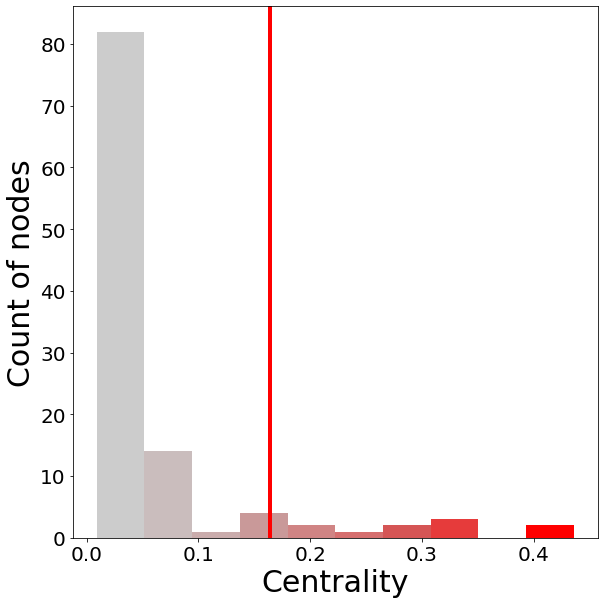

In [9]:
miRNET.draw_central_distr(miR_G=miR21_NET.LCC_miR_G,
                          key_nodes=miR21_NET.key_nodes,
                          mir_name='miR=21')

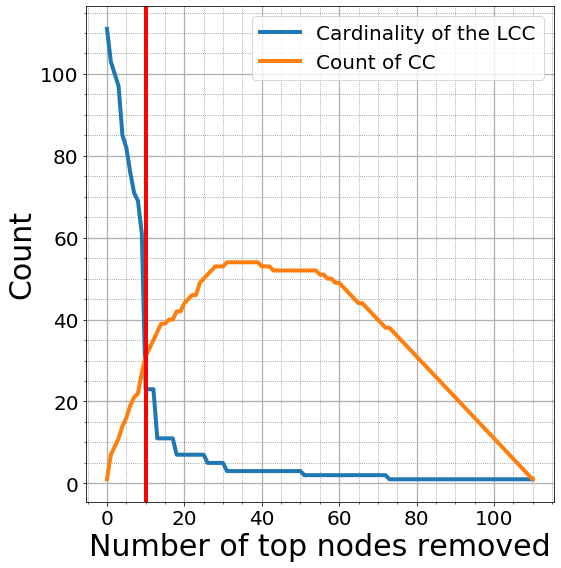

In [10]:
miRNET.draw_key_nodes_extractor(card_LCC=miR21_NET.graph_char['card_LCC'], 
                                n_CC=miR21_NET.graph_char['n_CC'], 
                                idx_max_dy=miR21_NET.graph_char['cutoff_point'], 
                                mir_name='miR21')

In [14]:
miRNET.draw_graph_to_cytoscape(miR_G=miR21_NET.LCC_miR_G, centrality_node=miR21_NET.centrality_node)

0  network components with less than two nodes have been removed


In [15]:
enrich_res = miRNET_enrichment.reactome_enrichment(miR21_NET.key_nodes.keys())

enrich_res = miRNET_enrichment.reac_pars(enrich_res)

G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей

reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

<Figure size 432x288 with 0 Axes>

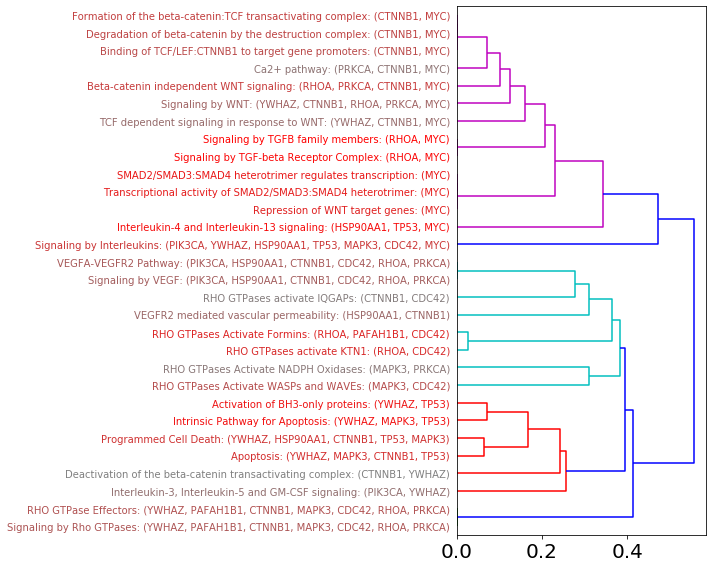

In [16]:
miRNET_enrichment.get_dendro(reactome_df, miR21_NET.key_nodes, 'miR21')